In [24]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
#Create a class for Linear Regression
class LinearRegression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        #Number of iterations of the Gradient Descent Algorithm
        self.max_iter = 1000000
        
        self.eps=1e-15
        
        #Learning Rate
        self.alpha = 0.0001
        
        
    def stochasticGradientDescent(self):
        
        
        #Initialize w and b with random value
        w = 0.25
        b = 0.3
        alpha = 0.00001
        
        check = True
        iter = 0
        while check:
            for j in range(len(self.x)):
                prev_w = w
                prev_b = b
                
                #Calculate y_pred
                y_pred = w * self.x[j] + b
                
                #Update slope
                w = w - alpha * (y_pred - self.y[j]) * self.x[j]
                
                #Update intercept
                b = b - alpha * (y_pred - self.y[j]) * 1
                
                iter += 1
                
                if (np.abs(w-prev_w) < self.eps and np.abs(b-prev_b) < self.eps) or iter == self.max_iter:
                    check = False
        
        print("Stochastic Gradient Descent algorithm took {} iters to converge".format(iter))
                
        return w,b
    
    def batchGradientDescent(self):
        
        #Initialize w and b with a random value
        w=0.25
        b=0.3
        
        check = True
        iter = 0
        n = len(self.x)
        
        while check:
            
            cost_intercept = 0
            cost_slope = 0
            
            prev_w = w
            prev_b = b
            
            
            for j in range(len(self.x)):
                
                #Calculate y_pred
                y_pred = w * self.x[j] + b
                
                #Calculate loss for the entire batch
                cost_intercept +=  (y_pred - self.y[j])*1 
                
                cost_slope +=  (y_pred - self.y[j])*self.x[j]
            
            #Update slope
            w = w - self.alpha * cost_slope / n
                
            #Update intercept
            b = b - self.alpha * cost_intercept / n
            
            iter += 1
                
            if (np.abs(w-prev_w) < self.eps and np.abs(b-prev_b) < self.eps) or iter == self.max_iter:
                check = False 
                
        print("Batch Gradient Descent algorithm took {} iters to converge".format(iter))
                
        return w,b
    
    
    def normalEquation(self):
        
        #Initialize w and b with random value
        w = 0.25
        b = 0.3
        
        #Create arrays for vectorized calculations using Numpy
        x_arr = np.array(self.x)
        y_arr = np.array(self.y)
        
        
        num = np.mean(x_arr*y_arr) - np.mean(x_arr)*np.mean(y_arr)
        den = np.mean(np.square(x_arr)) - np.square(np.mean(x_arr))
        w = num/den
        
        b = np.mean(y_arr) - w*np.mean(x_arr)
        
        return w,b
    
    
    def newtonMethod(self):
        #Create arrays for vectorized calculations using Numpy
        x_arr = np.array(self.x)
        y_arr = np.array(self.y)
        
        
        #Reshape x_arr and y_arr for matrix operations
        x_arr = x_arr.reshape(x_arr.shape[0], 1)
        y_arr = y_arr.reshape(y_arr.shape[0], 1)
        
        #Modify x_arr to 2-D, x[0] = 1
        x_arr = np.insert(x_arr, 0, 1, axis=1)
        
        #Initialize w_arr
        w_arr = np.ones((2, 1))
        
        #Source for Gradient and Hessian Equations
        #https://www.cs.ubc.ca/~schmidtm/Courses/Notes/linearQuadraticGradients.pdf
        
        
        check = True
        iter = 0
        while check and iter < self.max_iter:
            
            old_w_arr = w_arr
            
            #Calculate the gradient
            gradientLoss = np.matmul(np.dot(x_arr.T,x_arr),w_arr) - np.matmul(x_arr.T,y_arr)
        
            #Calculate the hessian
            hessianLoss = np.dot(x_arr.T,x_arr)

            #Calculate the hessian inverse
            hessianLossInv = np.linalg.inv(hessianLoss)
            
            #Use Newton's method to update w_arr
            w_arr = old_w_arr - np.matmul(hessianLossInv,gradientLoss)
            
            
            #Difference between new and old theta
            diff = np.linalg.norm(w_arr - old_w_arr)
            
            #Check if the difference is less than the eps specified
            if abs(diff) < self.eps:
                print("Linear Regression Algorithm converged")
                check = False
            
            print("This is iter: ", iter)
            print("This is w after Newton Method: ", w_arr)
            print("*"*10)
            iter += 1
        
        # return slope, intercept
        return w_arr[1,0], w_arr[0,0]
                
        

    
    def fit(self):
        #Fit the model
        return np.multiply(self.slope,self.x) + self.intercept
    
    
    def drawPlot(self):
        #Plot the dataset and model
        plt.scatter(self.x, self.y)
        plt.title("Simple Linear Regression")
        plt.xlabel("Salary in USD'000")
        plt.ylabel("Money spent on car purchase in USD'000")
        plt.plot(self.x, self.myModel)
        plt.show()   

In [58]:
#Dataset

#x - Annual Salary in USD'000
x = [20,22,25,28,34,40,45,51,58,62,65,70,74,78,82,85,89,92,95,99,102,104,110,112,117,123,126,130,134,140,144,148,150]

#y - Price of the car bought in USD'000
y = [35,41,35,24,32,36,50,59,63,50,36,84,80,88,94,64,80,98,68,88,80,72,95,96,104,120,105,118,110,130,125,118,135]

In [59]:
#Create an object of the class
myLinearReg = LinearRegression(x,y)

------------

## Linear Regression

### There are multiple approaches to find the parameters that minimize the Loss function in Linear Regression
#### 1. Gradient Descent
#### 2. Calculation of parameters using the Normal Equation
#### 3. Newton Raphson method
#### 4. Calculation of weights using Scipy

-----------------------

## 1. Gradient Descent

## Mathematics behind Gradient Descent

First we define the Hypothesis function - $h_{\theta}x = \theta_0 + \theta_1*x_1 $

Then, we define our cost function - $J(\theta) = (1/2n)\sum_{i=1}^{n} (h_{\theta}x^{(i)}-y^{(i)})^2 $

Next, we define the Gradient Descent update rule - $ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$

Here, $\alpha$ is the learning rate.

Calculating the Partial Derivative of $J(\theta)$

$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{\partial}{\partial \theta_j} \frac{1}{2}(h_{\theta}x-y)^2$

$= 2*\frac{1}{2}*(h_{\theta}x-y)*\frac{\partial}{\partial \theta_j}(h_{\theta}x-y)$

$= 2*\frac{1}{2}*(h_{\theta}x-y)*\frac{\partial}{\partial \theta_j}\sum_{i=0}^{d} (\theta_{i} x_{i}-y)$

$= (h_{\theta}x-y)*x_j$

For a single training example, the Gradient Descent update rule is
$ \theta_j := \theta_j - \alpha (h_{\theta}x-y)*x_j$

The rule is called the LMS update rule (LMS stands for “least mean squares”), and is also known as the Widrow-Hoff learning rule. 

In [60]:
#Execute the Stochastic Gradient Descent()
myLinearReg.slope, myLinearReg.intercept = myLinearReg.stochasticGradientDescent()
print("This is slope: ", myLinearReg.slope)
print("This is intercept: ", myLinearReg.intercept)

Stochastic Gradient Descent algorithm took 1000032 iters to converge
This is slope:  0.7945678164047105
This is intercept:  10.089931121919985


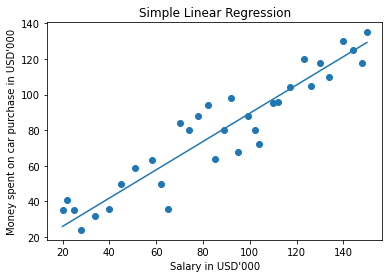

In [61]:
myLinearReg.myModel = myLinearReg.fit()
myLinearReg.drawPlot()

In [62]:
#Execute the Batch Gradient Descent()
myLinearReg.slope, myLinearReg.intercept = myLinearReg.batchGradientDescent()
print("This is slope: ", myLinearReg.slope)
print("This is intercept: ", myLinearReg.intercept)

Batch Gradient Descent algorithm took 1000000 iters to converge
This is slope:  0.7625146112952217
This is intercept:  13.235857452517509


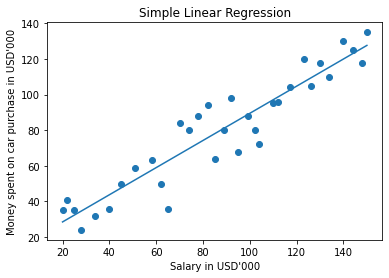

In [63]:
myLinearReg.myModel = myLinearReg.fit()
myLinearReg.drawPlot()

## 2. Calculation of parameters using the Normal Equation

### Deriving the parameters of the Normal Equation

We first define our general cost function: $J(\theta) = (1/2n)\sum_{i=1}^{n} (h_{\theta}x^{(i)}-y^{(i)})^2 $

Taking the cost function for Simple Linear Regression

$J = (1/2n)((b+wx)-y)^2 $

$J = (1/2n)((b+wx)^2+y^2-2(b+wx)y) $

$J = (1/2n)(b^2+w^2x^2 + 2bwx+y^2-2by-2wxy) $

*********

#### Taking the partial derivative wrt b

$\frac{\partial J}{\partial b} = (1/2n) * (2b + 2wx - 2y)$

Taking the parameters out that are independent of n

$\frac{\partial J}{\partial b} = (1/2) * (2b) + (1/2n) * (2wx - 2y) $

To find the value of b that minimizes the loss function, we equate $\frac{\partial J}{\partial b} = 0$

$(1/2) * (2b) + (1/2n) * (2wx - 2y) = 0 $

$ b = (y - wx)/n $

$ b = (\bar{y} - w\bar{x}) $

*********

#### Taking the partial derivative wrt w

$\frac{\partial J}{\partial b} = (1/2n) * (2wx^2 + 2bx - 2xy)$

$\frac{\partial J}{\partial b} = (1/2n) * (2wx^2 + 2x(b - y))$

Substituting the value of b from earlier derivation and solving the equation algebraically, we get

$ w = \frac{1/N(\sum_{n=1}^{N} x_n t_n) - \bar t \bar x}{1/N(\sum_{n=1}^{N} x^2) - \bar x \bar x} $


In [31]:
myLinearReg.slope, myLinearReg.intercept = myLinearReg.normalEquation()
print("This is slope: ", myLinearReg.slope)
print("This is intercept: ", myLinearReg.intercept)

This is slope:  0.7625146053675104
This is intercept:  13.235858069125015


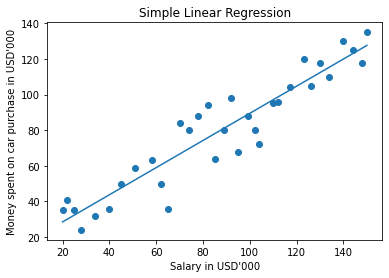

In [32]:
myLinearReg.myModel = myLinearReg.fit()
myLinearReg.drawPlot()

## 3. Calculation of parameters using the Newton Raphson method

### Deriving the Newton Raphson Method

Find the tangent line to $f(x)$ at point $(x_n,y_n)$

$y=f′(x_n)(x−x_n)+f(x_n)$

Find the x-intercept of the tangent line, $x_n+1$

$0=f′(x_n)(x_n+1−x_n)+f(x_n)$

$−f(x_n)=f′(x_n)(x_{n+1}−x_n)$

$x_{n+1}=x_n−f(x_n)f′(x_n)$

Find the y value at the x-intercept.

$y_{n+1}=f(x_{n+1})$

If $y_{n+1}−y_n≈0$:

return $y_{n+1}$ because we’ve converged!

Else update point $(x_n,y_n)$, and iterate

$x=x_{n+1},y=y_{n+1},$ goto (1).


********

In our case, since we are minimizing the derivative of the Loss function, Newton Method equation can be re-written as
$\theta_{n+1} = \theta + H^{-1}_{l(\theta)} \nabla{l(\theta)}$

In [33]:
myLinearReg.slope, myLinearReg.intercept = myLinearReg.newtonMethod()
print("This is slope: ", myLinearReg.slope)
print("This is intercept: ", myLinearReg.intercept)


This is iter:  0
This is w after Newton Method:  [[13.23585807]
 [ 0.76251461]]
**********
Linear Regression Algorithm converged
This is iter:  1
This is w after Newton Method:  [[13.23585807]
 [ 0.76251461]]
**********
This is slope:  0.7625146053675103
This is intercept:  13.235858069125015


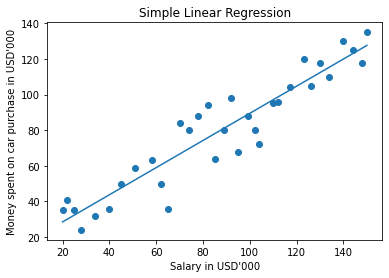

In [304]:
myLinearReg.drawPlot()

## 4. Calculation of weights using Scipy

In [305]:
# #Plot the dataset
# plt.scatter(myLinearReg.x, myLinearReg.y)
# plt.title("Simple Linear Regression")
# plt.xlabel("Annual Salary in USD'000")
# plt.ylabel("Price of car purchased in USD'000")
# plt.show()

In [306]:
slope, intercept, r, p, std_err = stats.linregress(myLinearReg.x, myLinearReg.y)
print("This is slope: ", slope)
print("This is intercept: ", intercept)



This is slope:  0.7625146053675103
This is intercept:  13.23585806912503


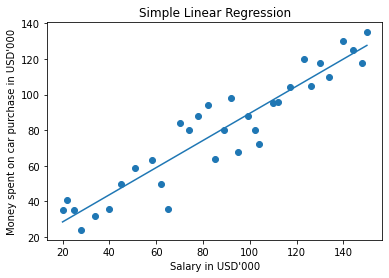

In [307]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.title("Simple Linear Regression")
plt.xlabel("Salary in USD'000")
plt.ylabel("Money spent on car purchase in USD'000")
plt.plot(x, mymodel)
plt.show()